In [349]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Distributions

A distribution in statistics describes the possible values a random variable can take and how likely they are to occur. In more plain language, it describes the "shape" of our data. 

### Note on Variable Names

In the future, we'll often refer to variables in datasets that we use in specific ways:
<ul>
<li> Target Variable: The variable we are trying to predict. Also know as `y`, dependent variable, or label.</li>
<li> Features: The variables that we use to predict the target variable. Also known as `X`, independent variables, or predictors.</li>
</ul>

In most cases, our data will have a target that we want to predict (e.g. will someone pay back a loan), and one or more features that we use to make that prediction (e.g. income, credit score, etc.). These terms are used across the data science community, so it's good to get familiar with them. As well, everything here is looking at numeric values, we'll look at categorical values in a later notebook.

In [350]:
nba = pd.read_csv("../data/NBA.csv")
nfl = pd.read_csv("../data/NFL.csv")

In [351]:
nfl["Height"] = nfl["Height (inches)"].astype(float) * 2.54
nfl["Weight"] = nfl["Weight (lbs)"].astype(float) * 0.453592
nfl.drop(["Height (inches)", "Weight (lbs)"], axis=1, inplace=True)
nfl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17172 entries, 0 to 17171
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   13504 non-null  float64
 1   Birth Place           14794 non-null  object 
 2   Birthday              16835 non-null  object 
 3   College               17133 non-null  object 
 4   Current Status        17172 non-null  object 
 5   Current Team          3096 non-null   object 
 6   Experience            17133 non-null  object 
 7   High School           2514 non-null   object 
 8   High School Location  2510 non-null   object 
 9   Name                  17172 non-null  object 
 10  Number                1708 non-null   float64
 11  Player Id             17172 non-null  object 
 12  Position              3096 non-null   object 
 13  Years Played          14076 non-null  object 
 14  Height                17026 non-null  float64
 15  Weight             

In [352]:
nba.head()

,Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
0,AJ Price,26,324,133,51,137,37.2,15,57,26.3,...,29.0,us,"October 7, 1986",University of Connecticut,5,185.0,PG,PHO,81.45,23.798393
1,Aaron Brooks,82,1885,954,344,817,42.1,121,313,38.7,...,30.0,us,"January 14, 1985",University of Oregon,6,180.0,PG,CHI,72.45,22.361111
2,Aaron Gordon,47,797,243,93,208,44.7,13,48,27.1,...,20.0,us,"September 16, 1995",University of Arizona,R,202.5,PF,ORL,99.00,24.142661
3,Adreian Payne,32,740,213,91,220,41.4,1,9,11.1,...,24.0,us,"February 19, 1991",Michigan State University,R,205.0,PF,ATL,106.65,25.377751
4,Al Horford,76,2318,1156,519,965,53.8,11,36,30.6,...,29.0,do,"June 3, 1986",University of Florida,7,205.0,C,ATL,110.25,26.234384


## Normal Distributions

The normal distribution is a continuous probability distribution that is symmetrical on both sides of the mean, so the right side of the center is a mirror image of the left side. The area under the normal distribution curve represents probability and the total area under the curve sums to one.

<b>Note:</b> The weirdness in the NFL one is due to the inches->cm conversion. Since we only have whole inch heights to start with, we only get a value every 2.54cm, so we get the weird humps. 

<Axes: xlabel='Height', ylabel='Density'>

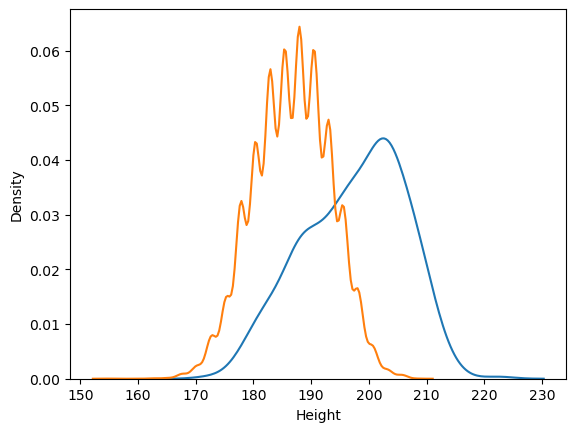

In [353]:
sns.kdeplot(data=nba, x="Height")
sns.kdeplot(data=nfl, x="Height")

### Why Normal Distributions are Important

Normal distributions are not universal, it is critical to understand that not all data will follow this pattern, but it is extremely common. Many older statistical tests that have existed long before machine learning assume that the data follows a normal distribution, so understanding when data is normally distributed is important. The reason for this is that a normal distribution, or any distribution, has specific properties that we can use as long as our data follows that distribution pattern. For example, if we know the mean and the standard deviation of a normally distributed dataset, we can say that 68% of the data falls within one standard deviation of the mean, 95% falls within two standard deviations, and 99.7% falls within three standard deviations. This is known as the 68-95-99.7 rule. This is an example of how statisticians such as those in Stats Canada can take a small sample of the population and make inferences about the entire population.

## Example - Generalizing from a Sample

Suppose we were only able to get hight data for 1000 NFL players, but we are in charge of ordering uniforms for the whole league. We can use the combination of:
<ul>
<li> The sample of 1000 heights we have. </li>
<li> The knowledge that the distribution of heights is normal. </li>
</ul>

To make inferences about the entire population of NFL players, as though we had data on all of them! We'll also take a smaller sample, just to see how the sample size affects our ability to generalize.

In [354]:
# Create a new DataFrame to store the results
results = pd.DataFrame({
    "Sample": ["Real Data"],
    "Mean": [nfl["Height"].mean()],
    "Median": [nfl["Height"].median()],
    "STD": [nfl["Height"].std()],
    "Over 195": [nfl[nfl["Height"] > 195].shape[0] / nfl.shape[0]],
    "Over 200": [nfl[nfl["Height"] > 200].shape[0] / nfl.shape[0]],
    "Under 180": [nfl[nfl["Height"] < 180].shape[0] / nfl.shape[0]],
    "Under 175": [nfl[nfl["Height"] < 175].shape[0] / nfl.shape[0]]
})

# Display the DataFrame
results

,Sample,Mean,Median,STD,Over 195,Over 200,Under 180,Under 175
0,Real Data,186.711333,187.96,6.547186,0.124738,0.01846,0.129688,0.025041


In [355]:
nfl_sample_1k = nfl.sample(1000, random_state=42)
nfl_sample_100 = nfl.sample(100, random_state=42)

##### Generate Metrics from Samples

We'll take the key metrics from our samples - the mean and standard deviation. These are all we need to make a normal distribution that follows the same pattern as our sample.

In [356]:
nfl_sample_1k_mean = nfl_sample_1k["Height"].mean()
nfl_sample_100_mean = nfl_sample_100["Height"].mean()
nfl_sample_1k_std = nfl_sample_1k["Height"].std()
nfl_sample_100_std = nfl_sample_100["Height"].std()

##### Generate Analytical Distributions

Now we can make normal distributions that follow the same pattern as our sample. We call these analytical distributions. 

In [357]:
nfl_sample_1k_dist = np.random.normal(nfl_sample_1k_mean, nfl_sample_1k_std, nfl.shape[0])
nfl_sample_100_dist = np.random.normal(nfl_sample_100_mean, nfl_sample_100_std, nfl.shape[0])

##### Compare the Sample and Analytical Distributions

Note that as things get more rare (the tails of the distribution), our results here will have more variance. If we are randomly selecting from ~17,000 people, and only 17 of them are over a certain height, the likelihood of us getting one of those 17 people in our sample is quite low, so we might get 2 one time, then 0 the next 30 times. The more data we have, the more accurate our analytical distribution will be.

In [358]:
# Create a new DataFrame to store the new results
new_results = pd.DataFrame({
    "Sample": ["Sample 1k", "Sample 100"],
    "Mean": [nfl_sample_1k_mean, nfl_sample_100_mean],
    "Median": [nfl_sample_1k["Height"].median(), nfl_sample_100["Height"].median()],
    "STD": [nfl_sample_1k_std, nfl_sample_100_std],
    "Over 195": [np.sum(nfl_sample_1k_dist > 195) / nfl.shape[0], np.sum(nfl_sample_100_dist > 195) / nfl.shape[0]],
    "Over 200": [np.sum(nfl_sample_1k_dist > 200) / nfl.shape[0], np.sum(nfl_sample_100_dist > 200) / nfl.shape[0]],
    "Under 180": [np.sum(nfl_sample_1k_dist < 180) / nfl.shape[0], np.sum(nfl_sample_100_dist < 180) / nfl.shape[0]],
    "Under 175": [np.sum(nfl_sample_1k_dist < 175) / nfl.shape[0], np.sum(nfl_sample_100_dist < 175) / nfl.shape[0]]
})

# Concatenate the new results with the existing results
results = pd.concat([results, new_results], ignore_index=True)

results = results.round(3)
results

,Sample,Mean,Median,STD,Over 195,Over 200,Under 180,Under 175
0,Real Data,186.711,187.96,6.547,0.125,0.018,0.130,0.025
1,Sample 1k,187.005,187.96,6.465,0.109,0.023,0.136,0.031
2,Sample 100,187.344,187.96,6.603,0.120,0.026,0.135,0.031


#### Results

The results are pretty good, even for the sample of 100 people. This means that if we are projecting things for the entire NFL (at least for height related things), we can be quite confident in our estimates even if we base what we are doing on a sample of only 100 people. When Stats Canada needs to project things for the entire Canadian population, this is how they do it. They can calculate things like ages and use that to generate projections like "number of retirees in 10 years" or "number of people in the workforce in 10 years" without needing to ask every single person in Canada.

The census happens infrequently, and only a small subset of the population takes the long form census that has detailed questions. The rest of the data is projected from that sample, and the boring logistics of the nation are planned around those projections.

## Other Distribution Types

The normal distribution is very common, particularly in things that we gather from the natural world, but it is definitely not the only distribution type. Data can follow many distribution patterns. 

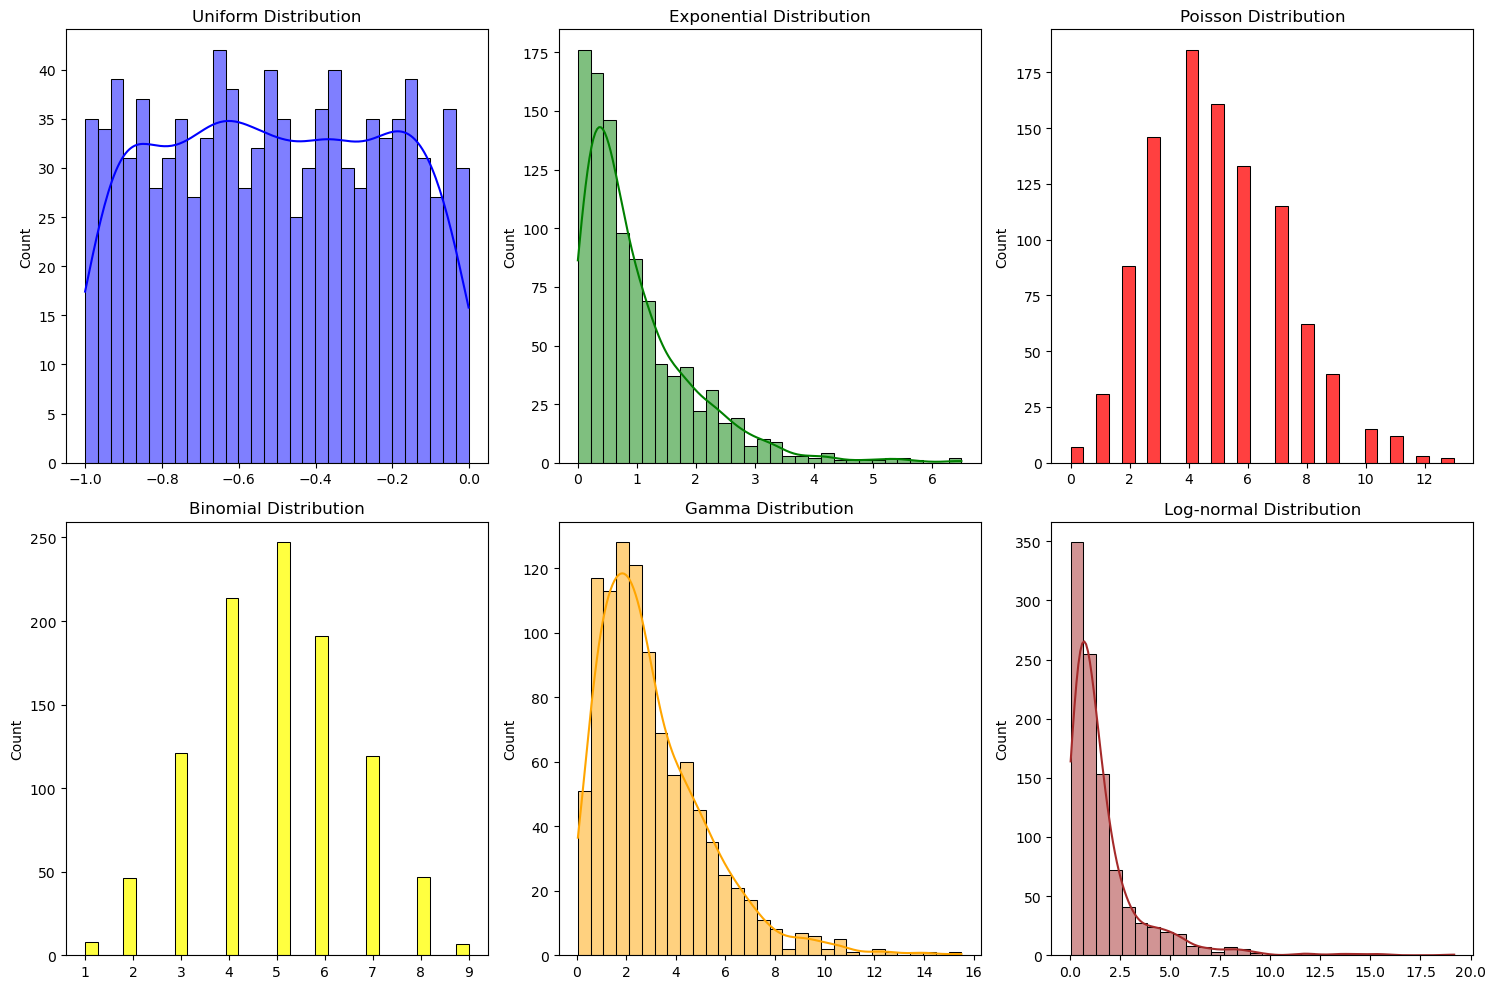

In [359]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Uniform distribution
uniform_data = np.random.uniform(-1,0,1000)
sns.histplot(uniform_data, kde=True, color='blue', bins=30, ax=axs[0, 0])
axs[0, 0].set_title('Uniform Distribution')

# Exponential distribution
exponential_data = np.random.exponential(1, 1000)
sns.histplot(exponential_data, kde=True, color='green', bins=30, ax=axs[0, 1])
axs[0, 1].set_title('Exponential Distribution')

# Poisson distribution
poisson_data = np.random.poisson(5, 1000)
sns.histplot(poisson_data, kde=False, color='red', bins=30, ax=axs[0, 2])
axs[0, 2].set_title('Poisson Distribution')

# Binomial distribution
binomial_data = np.random.binomial(10, 0.5, 1000)
sns.histplot(binomial_data, kde=False, color='yellow', bins=30, ax=axs[1, 0])
axs[1, 0].set_title('Binomial Distribution')

# Gamma distribution
gamma_data = np.random.gamma(2, 1.5, 1000)
sns.histplot(gamma_data, kde=True, color='orange', bins=30, ax=axs[1, 1])
axs[1, 1].set_title('Gamma Distribution')

# Log-normal distribution
lognormal_data = np.random.lognormal(0, 1, 1000)
sns.histplot(lognormal_data, kde=True, color='brown', bins=30, ax=axs[1, 2])
axs[1, 2].set_title('Log-normal Distribution')

# Display the plots
plt.tight_layout()
plt.show()

## Understanding Distributions

Understanding distributions is important because it allows us to understand the likelihood of different outcomes and make predictions about the future. In many cases, we can use assumptions about our data that we derive from the distribution to help us make better predictions. Some major uses of distributions include:
<ul>
<li> Exploring data - look at the distribution of our features and target varaibles to make decisions on how to use our data. </li>
    <ul>
    <li> E.g. if we have a varaible where all of the observations are the same, it's not going to be very useful for making predictions. </li>
    <li> We may use the median rather than mean for some datasets, such as things looking at income. </li>
    </ul>
<li> Choosing tools - some of the tools/algorithms that we use in machine learning make assumptions about the distribution of our data. If we choose things that make wrong assumptions, performance may be worse. </li>
    <ul>
    <li> E.g. linear regression assumes that our target variable is normally distributed. </li>
    </ul>
<li> Evaluating results - understanding what our data <i>should</i> look like can help us understand if our model is performing well. </li>
    <ul>
    <li> E.g. if we know that our target variable is normally distributed, we can look at our predictions to see if they match expectations. </li>
    </ul>
</ul>

### Small Caveat

We are glossing over may of the statistical details of distributions here. All of the machine learning models that we'll discuss later are based on statistical concepts such as distributions, but we don't need to know them in great detail to get started. If you're progressing further in machine learning, spending more time learning that statistical underpinnings of these models will be important in both gaining a better understanding and in helping you tune them to perform better. Modern machine learning libraries have made it easy enough to use and apply machine learning concepts with less statistical knowledge. 

We can, and will, proceed with a high-level understanding of the statistics of machine learning, and that will be fine. For learning more on the topic, I'd recommend the book "Think Stats" by Allen B. Downey. This book is free, written clearly for beginners, has practice Python workbooks with it, and gives a great introduction to the statistical concepts that underpin machine learning, with a focus on machine learning. 

## Exercise - Distributions

Use the NBA dataset to:
<ul>
<li> Plot the distribution of player heights. </li>
<li> Check if the distribution of player heights is normal, close to normal, or totally different from normal. </li>
<li> Calculate the mean and standard deviation of player heights. </li>
<li> Generate an analytical distribution that follows the same pattern as the player heights, use a sample of 100 to generate this. </li>
<li> Plot the analytical distribution and compare it to the distribution of player heights. </li>
</ul>

<Axes: xlabel='Height', ylabel='Count'>

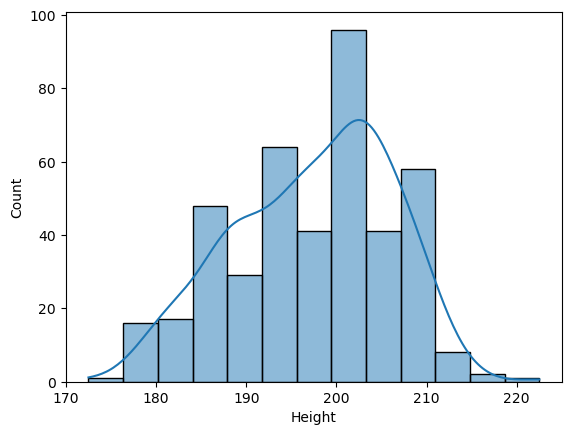

In [360]:
sns.histplot(nba["Height"], kde=True)
# kinda normal

In [361]:
nba_height_mean = nba["Height"].mean()
nba_height_std = nba["Height"].std()
nba_height_mean, nba_height_std

(197.44075829383885, 8.740249940352058)

In [362]:
nba_sample = nba.sample(100)
nba_sample_mean = nba_sample["Height"].mean()
nba_sample_std = nba_sample["Height"].std()
nba_sample_mean, nba_sample_std

(198.3423913043478, 8.989288298243338)

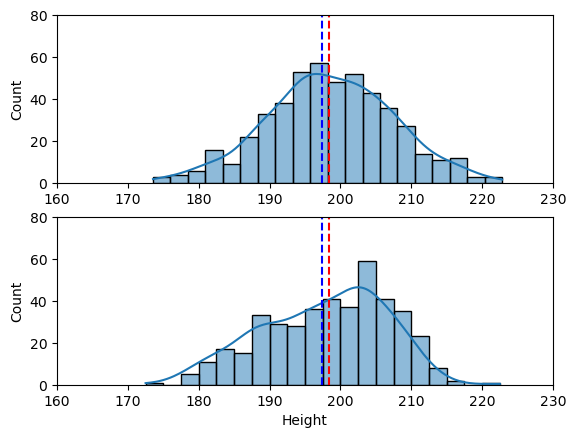

In [363]:
nba_sample_dist = np.random.normal(nba_sample_mean, nba_sample_std, nba.shape[0])
fig, ax = plt.subplots(2)
sns.histplot(nba_sample_dist, kde=True, ax=ax[0], bins=20)
sns.histplot(nba["Height"], kde=True, ax=ax[1], bins=20)
for axes in ax:
    axes.set_xlim(160, 230)
    axes.set_ylim(0, 80)
    axes.axvline(nba_sample_mean, color='red', linestyle='--')
    axes.axvline(nba_height_mean, color='blue', linestyle='--')

## Multiple Variables

The distributions we've talked about so far are all univariate, meaning they only describe one variable. In machine learning, we generally want to examine the relationships between two or more variables, in particular we want to use those relationships to help us make predictions for our target variable.

### Scatter Plots

Scatter plots are one of the most common charts used in data science, and are the primary tool to get an idea of the relationship between two variables. A scatter plot has a few key components:
<ul>
<li> X-axis: The independent variable, feature, input, or the thing we know ahead of time. </li>
<li> Y-axis: The dependent variable, target, output, or the thing we want to predict. </li>
<li> Points: Each point represents a single observation (row) in our dataset. </li>
</ul>

We can plot any two variables against each other to see if there is a relationship between them visually. The seaborn regplot will make a scatter plot and fit a line to the data, which can help us see the relationship between the two variables.

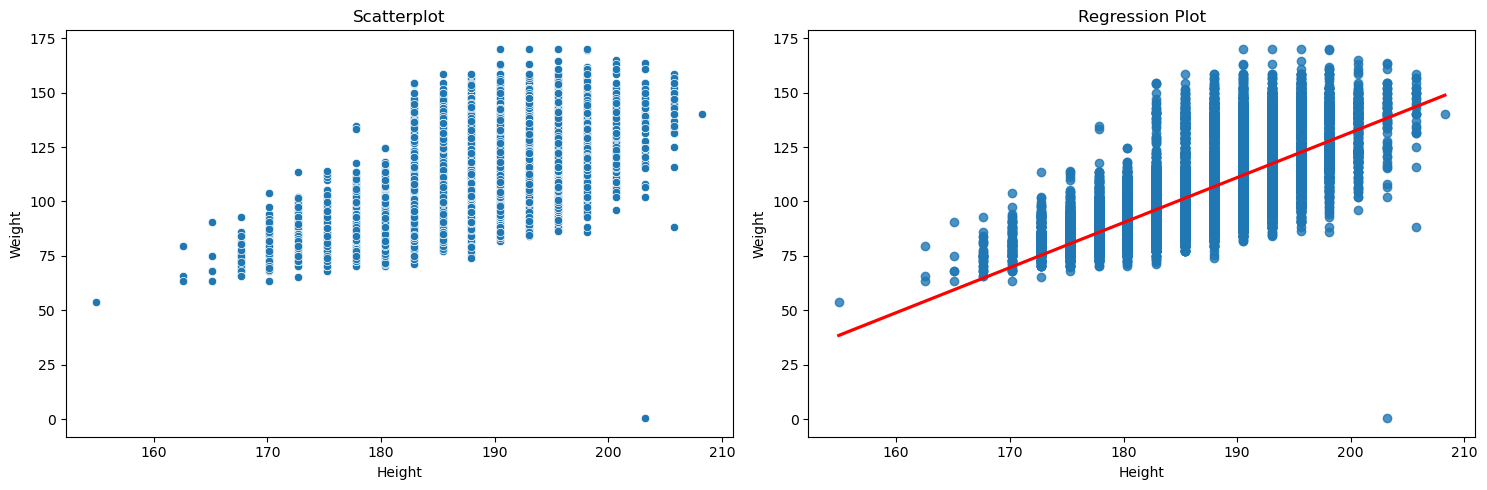

In [364]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Scatterplot
sns.scatterplot(data=nfl, x="Height", y="Weight", ax=axs[0])
axs[0].set_title('Scatterplot')

# Regression plot
sns.regplot(data=nfl, x="Height", y="Weight", ax=axs[1], line_kws={"color": "red"})
axs[1].set_title('Regression Plot')

# Display the plots
plt.tight_layout()
plt.show()

## Correlation

Correlation is a measure of the strength and direction of the relationship between two variables. It is a number between -1 and 1. A positive correlation indicates that the two variables move in the same direction, while a negative correlation indicates that the two variables move in opposite directions.

In this example, there's pretty clearly some correlation - as people get taller, they tend to weigh more. The correlation isn't perfect, we see a bunch of variance in the data, but there's a clear trend.

We can get the correlation using the Pandas `corr` method. This will give us a matrix of the correlation between all of the variables in our dataset, so if we only want a single value, we can just select the row and column that we want.

In [365]:
nfl[['Height', 'Weight']].corr()

,Height,Weight
Height,1.000000,0.712048
Weight,0.712048,1.000000


### Pearson Correlation Coefficient

The Pearson correlation coefficient is a measure of the strength and direction of the linear relationship between two variables. It is a number between -1 and 1. A positive correlation indicates that the two variables move in the same direction, while a negative correlation indicates that the two variables move in opposite directions.  A value of 0 indicates that there is no linear relationship between the two variables.  The formula for the Pearson correlation coefficient is:

$$r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}}$$

Where:
- $r$ is the Pearson correlation coefficient
- $x_i$ is the value of the x-variable for the $i$th data point
- $\bar{x}$ is the mean of the x-variable
- $y_i$ is the value of the y-variable for the $i$th data point
- $\bar{y}$ is the mean of the y-variable
- $n$ is the number of data points

We don't need to do the math by hand, as the Pearson is the default correlation coefficient used in the `corr` method, but we can also specify it to be sure.

In [366]:
nfl_corr_pearson = nfl[["Height", "Weight"]].corr(method="pearson")
nfl_corr_pearson

,Height,Weight
Height,1.000000,0.712048
Weight,0.712048,1.000000


## Spearman Correlation Coefficient

The Spearman correlation coefficient is a measure of the strength and direction of association between two ranked variables. It is a number between -1 and 1. A positive correlation indicates that the two variables move in the same direction, while a negative correlation indicates that the two variables move in opposite directions.  A value of 0 indicates that there is no relationship between the two variables.  The formula for the Spearman correlation coefficient is:

$$r_s = 1 - \frac{6\sum d_i^2}{n(n^2 - 1)}$$

Where:
- $r_s$ is the Spearman correlation
- $d_i$ is the difference between the ranks of corresponding variables
- $n$ is the number of data points

Spearman correlation is kind of the equivalent of the median for correlation - it is less sensitive to outliers than the Pearson correlation coefficient. The Pearson correlation is the "default" measure of correlation, just as the mean is the default measure of average, but in scenarios where the data is not normally distributed, the Spearman correlation coefficient is often a better measure of correlation. We can generate the Spearman correlation by specifying `method='spearman'` in the `corr` method.

In [367]:
nfl_corr_spearman = nfl[["Height", "Weight"]].corr(method="spearman")
nfl_corr_spearman

,Height,Weight
Height,1.000000,0.750854
Weight,0.750854,1.000000


## Detour - Pair Plot

If we have data that has a large number of features, we can use a graph called a pair plot to see a quick summary of the correlation and distributions for all of our numeric features at once. This is a great way to get a quick overview of our data. 

<b>Note:</b> if there is a lot of data, a pair plot may take a long time to run. In such a case, using the .sample(N), where N is the number of rows you want to sample, can be a good way to get a quick look at the data. In most cases, 1000 (or even fewer) rows will look the same on a pair plot as 100,000 rows.

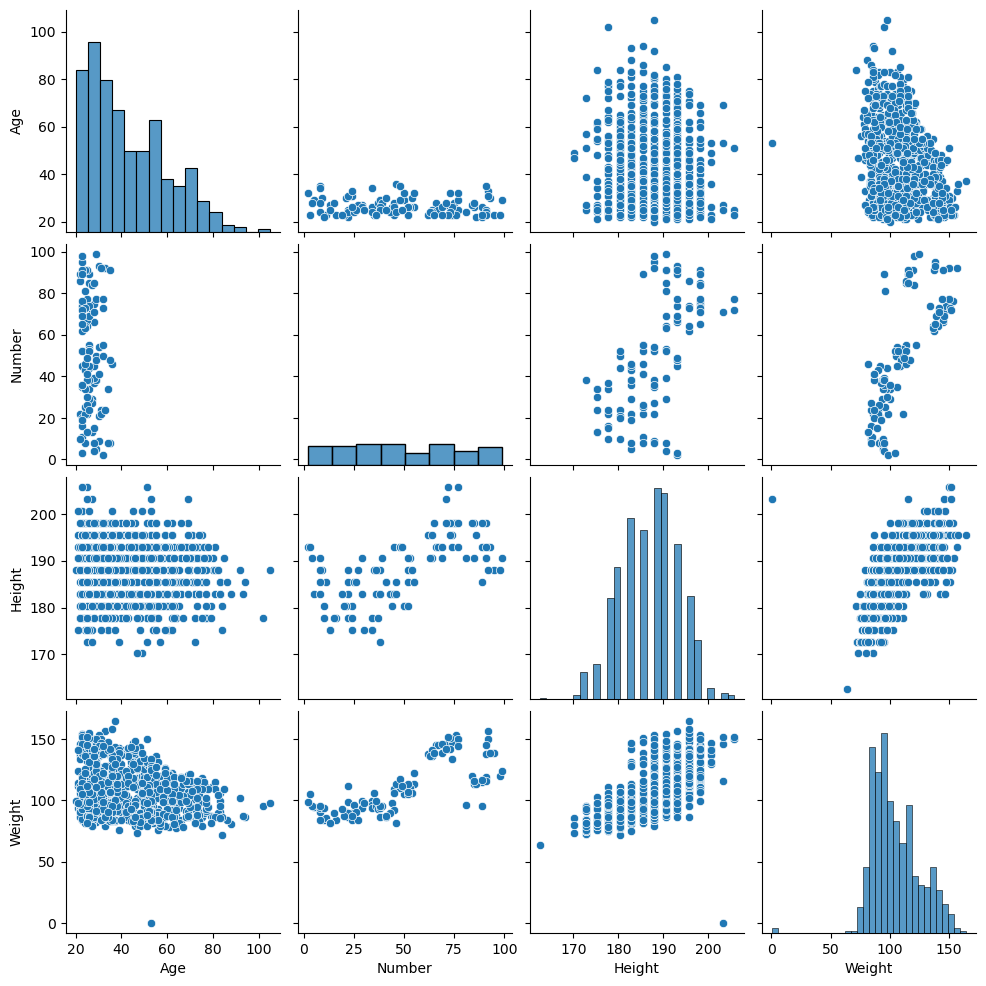

In [368]:
sns.pairplot(nfl_sample_1k)

## Causation vs Correlation

As you may have heard, correlation does not indicate causation - it might, but it might not. For example, there is a strong correlation between ice cream sales and drowning deaths. This is because both of these things are more likely to happen in the summer. This is a classic example of correlation without causation. On the other hand, there is a strong correlation between smoking and lung cancer, and there is a strong body of evidence that smoking causes lung cancer. Knowing the correlation between two variables is a good starting point, but it is not enough to say that one causes the other. Determining causation is a complex field, and generally requires some intimate knowledge of the subject matter. Some basic techniques for determining causation include:
<ul>
<li> Sequence of events - if one thing always happens before another, it is more likely to be the cause. </li>
<li> Controlled experiments - if we can control all of the variables except for the one we are interested in, we can be more confident in our conclusions. </li>
<li> Expert knowledge - if we know a lot about the subject matter, we can make more informed decisions. </li>
</ul>

This is not really a focus of ours, just something to be aware of. 

## Correlation for Predictions

Correlation tells us how strong the relationship between two variables is, phrased differently, it tells us how much we can learn about one variable (the target) by knowing the other variable (the feature). If the correlation between two variables is 1 or -1, then knowing the value of one variable tells us exactly what the value of the other variable is - we have a perfect prediction. 

## Best Fit Line

You are likely already a little familiar with predictive models from your time in high school math, as you've probably done a line of best fit. The line of best fit is a straight line that best represents the data on a scatter plot. The line of best fit does not necessarily pass through every (or even any) of the points on the scatter plot, but it does represent the general trend in the data. The line of best fit is generated by calculating the slope and y-intercept of the line that minimizes the sum of the squared differences between the observed values and the values predicted by the line. In other words, the location of the line is wherever the distance (technically the square of the distance) between the line and the points is minimized.

In a two-dimensional space, the equation for a line is:

$$y = mx + b$$

Where:
- $y$ is the dependent variable
- $x$ is the independent variable
- $m$ is the slope of the line
- $b$ is the y-intercept

In scenarios with more than one X value, we add more m*x terms to the equation. 

### Using a Line of Best Fit

The purpose of the line of best fit is to give us something (a model) that can translate any input into a prediction of the corresponding output. In most cases, we have lots of records of data in our scatter plot, but we likely have more than one record for some X values, and no records for others. The line of best fit is a generalized model of those observations - rather than listing out the data we have, we provide a model that can generate what we expect the data to be for any input. The linear least squares equation is:

$$m = \frac{n(\sum xy) - (\sum x)(\sum y)}{n(\sum x^2) - (\sum x)^2}$$

$$b = \frac{(\sum y)(\sum x^2) - (\sum x)(\sum xy)}{n(\sum x^2) - (\sum x)^2}$$

Where:

- $m$ is the slope of the line
- $b$ is the y-intercept
- $n$ is the number of data points
- $x$ is the independent variable
- $y$ is the dependent variable

In [369]:
def linear_least_squares(x, y):
    """
    Calculate the coefficients of the least squares line. This uses array calculations, so it looks a little different. 

    Parameters
    ----------
    x : array-like
        The x-coordinates of the data points.
    y : array-like
        The y-coordinates of the data points.

    Returns
    -------
    tuple
        The slope and intercept of the least squares line.
    """
    # Calculate the means of x and y
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    # Calculate the slope and intercept
    slope = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
    intercept = y_mean - slope * x_mean

    return slope, intercept

In [370]:
nfl_slope, nfl_intercept = linear_least_squares(nfl["Height"], nfl["Weight"])
nfl_slope, nfl_intercept

(2.068339440318928, -282.2097547919985)

We can create an actual model for our data as well, this is officially our first machine learning model. This model will take in any input of our known variable, the height, and give us a prediction of the weight. This is the exact same thing any other machine learning model does, just with a different set of inputs and outputs.

In [371]:
def nfl_best_fit(x):
    """
    Calculate the best fit line for the NFL data.

    Parameters
    ----------
    x : array-like
        The x-coordinates of the data points.

    Returns
    -------
    array-like
        The y-coordinates of the best fit line.
    """
    return nfl_slope * x + nfl_intercept

#### Plotting

We can calculate a line of best fit and plot it with our data, we can also use a regplot, which should be virtually identical to the line of best fit that we calculate.

Text(0.5, 1.0, 'Regression Plot')

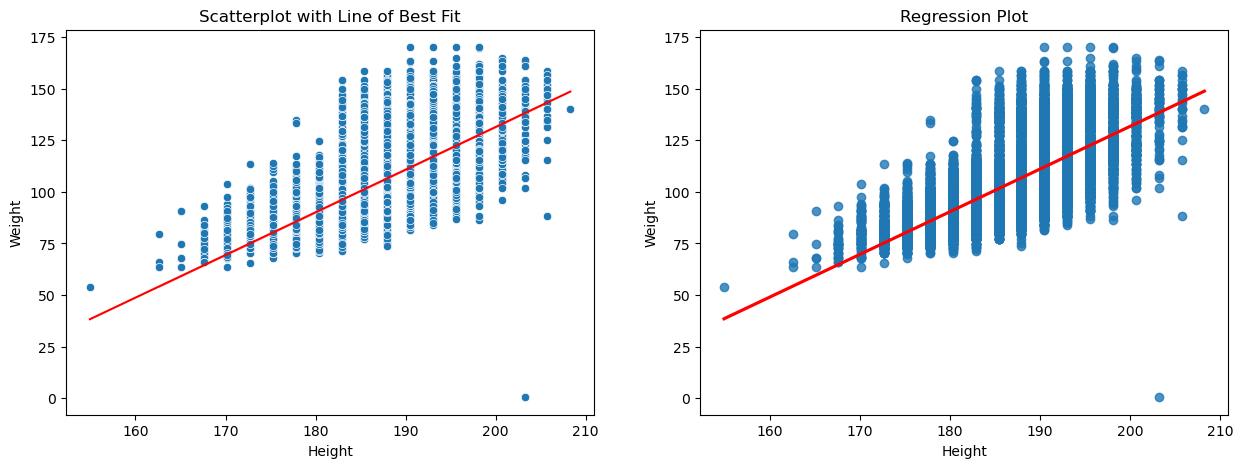

In [372]:
calculated_best_fit = nfl_slope * nfl["Height"] + nfl_intercept

# Plot the scatterplot and the line of best fit
# Create a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.scatterplot(data=nfl, x="Height", y="Weight", ax=axs[0])
sns.lineplot(x=nfl["Height"], y=calculated_best_fit, ax=axs[0], color='red')
axs[0].set_title('Scatterplot with Line of Best Fit')

# Regplot
sns.regplot(data=nfl, x="Height", y="Weight", ax=axs[1], line_kws={'color': 'red'})
axs[1].set_title('Regression Plot')

### Residuals

When creating a line of best fit, we are left with a model (our line) which is a good representation of the data, but is not perfect, there is still error. We call these errors residuals. The residual for a given point is the difference between the observed value and the value predicted by the line of best fit. The size of the residual is the amount of error between a model (our line of best fit) and the real value (each point on the scatter plot). Our line of best fit is the generalized model that tells us what to expect for any input of X, but it is wrong in most of its predictions - sometimes by a little, sometimes by a lot. A good model, or an accurate line of best fit, will minimize these residuals, so that our predictions are as close to the observed values as possible.

In the plot below, the y axis for the residuals is the difference between the observed value and the value predicted by the line of best fit, or how wrong our model is for each point. The close these values are, the less error we have in each prediction, and the better our model is. We can evaluate the quality of our models by using the residuals to calculate metrics that tell us how well our model is performing. Everything that has both a true value (original data) and a prediction/generalization (model) will have residuals. 

<b>Note:</b> the calculations can be done with one line of code below. The dataframe is smart enough to process operations like subtraction on a row by row basis, so we can just subtract the predicted values from the true values to get the residuals.

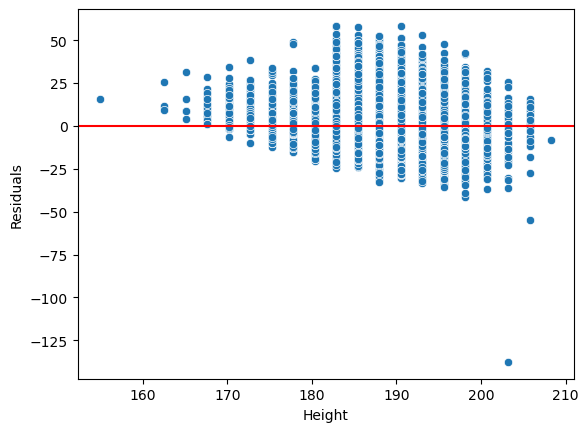

In [373]:
nfl["Predicted Weight"] = nfl_best_fit(nfl["Height"])
nfl["Residuals"] = nfl["Weight"] - nfl["Predicted Weight"]
sns.scatterplot(data=nfl, x="Height", y="Residuals")
plt.axhline(0, color='red')

## Exercise - Correlation and Best Fit Line

Use the NBA dataset to:
<ul>
<li> Calculate the correlation between player height and player weight, also get the Spearman correlation. </li>
<li> Generate a scatter plot of player height and player weight. </li>
<li> Generate a line of best fit for player height and player weight. </li>
<li> Calculate the residuals for the model. </li>
</ul>


In [374]:
nba.head()

,Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
0,AJ Price,26,324,133,51,137,37.2,15,57,26.3,...,29.0,us,"October 7, 1986",University of Connecticut,5,185.0,PG,PHO,81.45,23.798393
1,Aaron Brooks,82,1885,954,344,817,42.1,121,313,38.7,...,30.0,us,"January 14, 1985",University of Oregon,6,180.0,PG,CHI,72.45,22.361111
2,Aaron Gordon,47,797,243,93,208,44.7,13,48,27.1,...,20.0,us,"September 16, 1995",University of Arizona,R,202.5,PF,ORL,99.00,24.142661
3,Adreian Payne,32,740,213,91,220,41.4,1,9,11.1,...,24.0,us,"February 19, 1991",Michigan State University,R,205.0,PF,ATL,106.65,25.377751
4,Al Horford,76,2318,1156,519,965,53.8,11,36,30.6,...,29.0,do,"June 3, 1986",University of Florida,7,205.0,C,ATL,110.25,26.234384


## Key Points

The idea of correlation is really important going forward, as is the idea of a model (e.g. line of best fit), and the residuals that come from it. These are the building blocks of machine learning, and we'll be using them a lot going forward.

What we've done towards the end is a simple example of creating a machine learning model:
<ul>
<li> We have a target variable (weight) that we want to predict, and we have one or more features (height) that we want to use to make that prediction. </li>
<li> We have some old data, with the target and the features present that we can use to 'train' our model. </li>
<li> We feed our data to some algorithm, in this case linear-least squares, which does some behind the scenes math and results in a model that:</li>
    <ul>
    <li> Takes in an input of X (or multiple Xs). </li>
    <li> Returns a prediction of Y. </li>
    <li> All machine learning models do this basic thing, we just have different targets and different features. Even large-language models are predicting "what is the next word" from an input of "the current text that is being written". </li>
    <li> "The model" is visually the line of best fit. Mathmatically it is the y = m*x + b equation. The parts we need to generate to have a model are the m and b values (the rest is our inputs). This is the end result of machine learning, a model that predicts a specific thing, given specific inputs. </li>
    </ul>
<li> We can evaluate the quality of our model by looking at the residuals, which are the difference between the true value and the predicted value. </li>
</ul>

There, machine learning in a nutshell! Polish the resumes. 